In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Name of the CSV file
file = '../Resources/US_Accidents_May19.csv'
df = pd.read_csv(file)

In [73]:
# Add a column to sort by year
df["Start_Year"] = df["Start_Time"].agg(lambda x: x.split("-")[0])

# remove years with incomplete data
df = df[df["Start_Year"] != "2019"]
df = df[df["Start_Year"] != "2015"]

# Count total traffic incidents by year
df_years = df.groupby("Start_Year").count()
total_accidents_per_year = df_years["ID"].tolist()

In [74]:
# List of traffic infrastructure
infrastructure_list = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

# Set up lists for loop
accident_data_2016 = []
accident_data_2017 = []
accident_data_2018 = []

# Select years to look for
years = ["2016","2017","2018"]

# Loop through traffic infrastructure types and pull out data based on year
i = 0
for year in years:
    for traffic_type in infrastructure_list:
        if year == "2016":
            accident_data_2016.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())
        elif year == "2017":
            accident_data_2017.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())
        elif year == "2018":
            accident_data_2018.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())

In [75]:
# percent of accidents near traffic infastructure per year
accident_data_sum = []
accident_data_sum.append(sum(accident_data_2016))
accident_data_sum.append(sum(accident_data_2017))
accident_data_sum.append(sum(accident_data_2018))

i = 0
infra_percents = []
for i in range(0,3):
    infra_percents.append(accident_data_sum[i]/total_accidents_per_year[i])

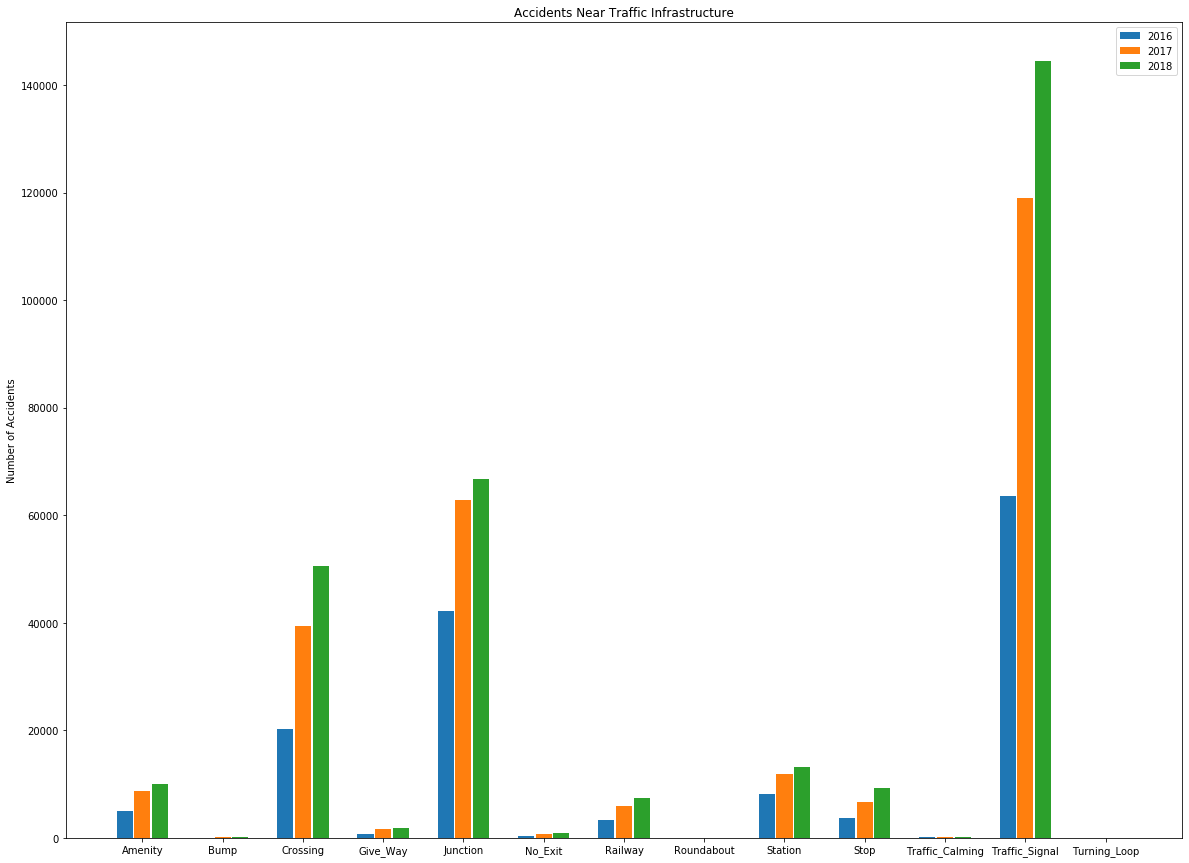

In [77]:
# Set up graph for all three years of data

x = np.arange(len(infrastructure_list))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, accident_data_2016, width, label='2016')
rects2 = ax.bar(x, accident_data_2017, width, label='2017')
rects3 = ax.bar(x + width*1.1, accident_data_2018, width, label='2018')

ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents Near Traffic Infrastructure')
ax.set_xticks(x)
ax.set_xticklabels(infrastructure_list)
ax.legend()
#plt.show()

In [69]:
# remove 2015 and 2019 values from data frame
df = df[df["Start_Year"] != "2019"]
df = df[df["Start_Year"] != "2015"]

grouped_years = df.groupby("Start_Year").count()
incidents_per_year = grouped_years["ID"].tolist()

# convert street name to list
street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy"]
all_street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy","Local Road"]

streets_2016 = []
streets_2017 = []
streets_2018 = []

#for year in years:
i = 0
for year in years:
    for street_type in street_types:
        if year == "2016":
            streets_2016.append(df["Street"].loc[(df["Street"].str.contains(street_type)==True) & (df["Start_Year"] == year)].count())
        elif year == "2017":
            streets_2017.append(df["Street"].loc[(df["Street"].str.contains(street_type)==True) & (df["Start_Year"] == year)].count())
        elif year == "2018":
            streets_2018.append(df["Street"].loc[(df["Street"].str.contains(street_type)==True) & (df["Start_Year"] == year)].count())

streets_2016.append(incidents_per_year[0]-sum(streets_2016))
streets_2017.append(incidents_per_year[1]-sum(streets_2017))
streets_2018.append(incidents_per_year[2]-sum(streets_2018))

In [70]:
location_type_df = pd.DataFrame(list(zip(streets_2016,streets_2017,streets_2018)),columns=["2016","2017","2018"],index=all_street_types)
location_type_df.head(10)

,2016,2017,2018
I-,94733,157315,197572
State Route,2366,3811,3841
Fwy,34621,42414,42722
US-,17298,29972,32461
Pike,2936,5195,5860
CA-,15424,18287,20475
Hwy,9982,18293,27476
Local Road,233241,442203,562217


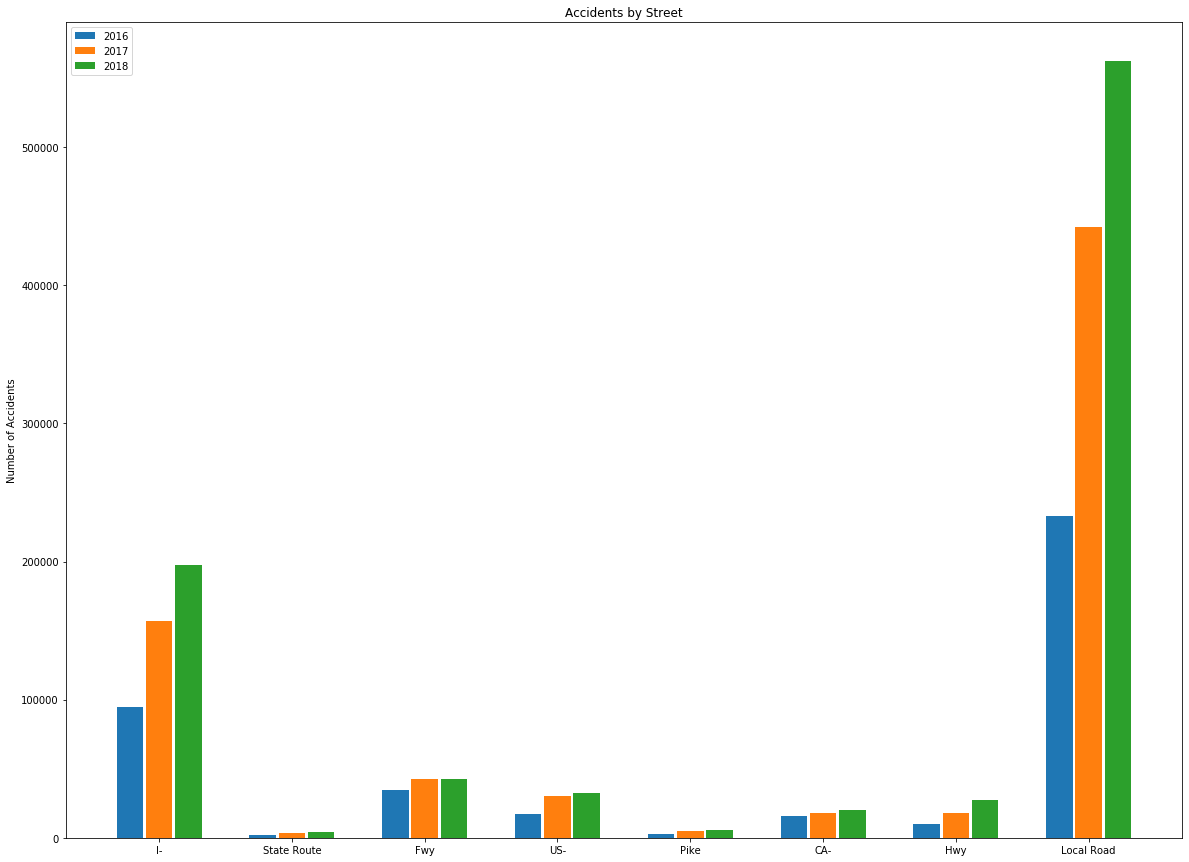

In [72]:
x = np.arange(len(all_street_types))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, streets_2016, width, label='2016')
rects2 = ax.bar(x, streets_2017, width, label='2017')
rects3 = ax.bar(x + width*1.1, streets_2018, width, label='2018')

ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents by Street')
ax.set_xticks(x)
ax.set_xticklabels(all_street_types)
ax.legend()

# Outerbelt S?

In [101]:
# compare total "highways" vs "local roads" in pie graph
df["Street"].head(50)

0                        I-70 E
1                      Brice Rd
2                State Route 32
3                        I-75 S
4     Miamisburg Centerville Rd
5                Westerville Rd
6                N Woodward Ave
7                     N Main St
8                Notre Dame Ave
9                Westerville Rd
10                  Outerbelt S
11                       I-70 E
12               Watervliet Ave
13                    Salem Ave
14                   E Broad St
15                  Glencoe Ave
16         S James H McGee Blvd
17                  Delphos Ave
18                   Rubicon St
19              W Hillcrest Ave
20                 Brookhill Dr
21                 Princeton Dr
22              Springboro Pike
23                  North Fwy S
24                   Hoover Ave
25            Sportsman Club Rd
26                   Irving Ave
27                  W Helena St
28               Litchfield Ave
29                     E 4th St
30                    Frantz Rd
31      

In [97]:
# based on cardinal direction

direction_types = [" N","N "," N "," S","S "," S "," E","E "," E "," W","W "," W"," NE","NE "," NE "," NW","NW "," NW "," SE","SE "," SE "," SW","SW "," SW "]

directions_2016 = []
directions_2017 = []
directions_2018 = []

#for year in years:
i = 0
for year in years:
    for direction_type in direction_types:
        if year == "2016":
            directions_2016.append(df["Street"].loc[(df["Street"].str.contains(direction_type)==True) & (df["Start_Year"] == year)].count())
        elif year == "2017":
            directions_2017.append(df["Street"].loc[(df["Street"].str.contains(direction_type)==True) & (df["Start_Year"] == year)].count())
        elif year == "2018":
            directions_2018.append(df["Street"].loc[(df["Street"].str.contains(direction_type)==True) & (df["Start_Year"] == year)].count())

In [98]:
print(directions_2016)

[69576, 14766, 2664, 115315, 20868, 2394, 52716, 13936, 2101, 50257, 19814, 50257, 2446, 865, 131, 1968, 1267, 205, 1812, 222, 59, 1482, 1131, 211]


In [99]:
north = directions_2016[0] + directions_2016[1] + directions_2016[2]
south = directions_2016[3] + directions_2016[4] + directions_2016[5]
east = directions_2016[6] + directions_2016[7] + directions_2016[8]
west = directions_2016[9] + directions_2016[10] + directions_2016[11]
northeast = directions_2016[12] + directions_2016[13] + directions_2016[14]
northwest = directions_2016[15] + directions_2016[16] + directions_2016[17]
southeast = directions_2016[18] + directions_2016[19] + directions_2016[20]
southwest = directions_2016[21] + directions_2016[22] + directions_2016[23]

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

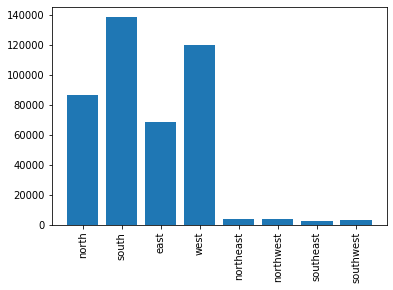

In [129]:
x = [north,south,east,west,northeast,northwest,southeast,southwest]
labels = ["north","south","east","west","northeast","northwest","southeast","southwest"]
plt.bar(labels,x)
plt.xticks(rotation="vertical")

In [102]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,2016
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,2016
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,2016
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2016


In [127]:
# loop through street column
df.iloc[0,13]

north_stats = 0
south_stats = 0
west_stats = 0
east_stats = 0
northeast_stats = 0
northwest_stats = 0
southeast_stats = 0
southwest_stats = 0

i = 0
for i in range(len(df)):
    street_name = df.iloc[i,13]
    
    if street_name[-2:] == " N":
        north_stats = north_stats + 1
    elif street_name[-2:] == " S":
        south_stats = south_stats + 1
    elif street_name[-2:] == " W":
        west_stats = west_stats + 1
    elif street_name[-2:] == " E":
        east_stats = east_stats + 1
    if street_name[-3:] == " NE":
        northeast_stats = north_stats + 1
    elif street_name[-3:] == " NW":
        northwest_stats = south_stats + 1
    elif street_name[-3:] == " SE":
        southeast_stats = west_stats + 1
    elif street_name[-3:] == " SW":
        southwest_stats = east_stats + 1

In [119]:
len(df)

2020715

<BarContainer object of 8 artists>

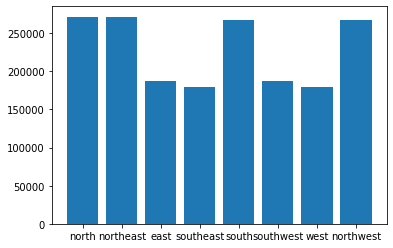

In [133]:
x = [north_stats,northeast_stats,east_stats,southeast_stats,south_stats,southwest_stats,west_stats,northwest_stats]
labels = ["north","northeast","east","southeast","south","southwest","west","northwest"]
plt.bar(labels,x,)

([<matplotlib.patches.Wedge at 0x122769cd0>,
 [Text(0.0375898708492123, 1.0993575403887217, 'north'),
  Text(0.910476121248242, 0.6172788937237016, 'northeast'),
  Text(1.0781356026288116, -0.21822837199642373, 'east'),
  Text(0.736972917260521, -0.8166216499851798, 'southeast'),
  Text(-0.04534114523596528, -1.0990651393564856, 'south'),
  Text(-0.8117224094836035, -0.7423656309003897, 'southwest'),
  Text(-1.0940592917919547, -0.11416771016222933, 'west'),
  Text(-0.8614404562086708, 0.6840470308443689, 'northwest')])

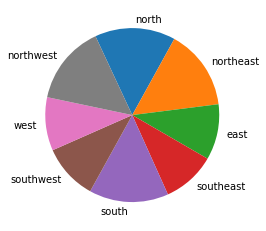

In [142]:
plt.pie(x,labels=labels,counterclock=False,startangle=115)